In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from sqlite3 import Error

In [2]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

In [3]:
books = pd.read_csv('books.csv')

# Convert dates to datetime format and remove value that prevents this
books = books[books['bookID'] != 31373]
books['publication_date'] = pd.to_datetime(books['publication_date'], errors = 'coerce')

# Ensure that the data has a certain threshold of input
books = books[books['ratings_count'] > 1000]

# Fixes naming of the num_pages variable
books.rename(columns={'  num_pages': 'num_pages'}, inplace = True)

# Removes values where the number of pages of a book is zero (indicator of bad data)
books = books[books['num_pages'] != 0]

# Removes values where the values state that the value is not a book
books = books[books['authors'] != 'NOT A BOOK']

# Renames columns to match styles of the other dbs
books = books.rename(columns = {'bookID': 'BookID', 'title': 'Title', 'authors': 'Authors',
                                'average_rating': 'Score', 'isbn': 'ISBN', 'isbn13': 'ISBN13',
                                'language_code': 'Language', 'num_pages': 'Num_Pages',
                                'ratings_count': 'Ratings_Count', 'text_reviews_count':
                                'Text_Reviews_Count', 'publication_date': 'Publication_Date',
                                'publisher': 'Publisher'})

books['Type'] = 'Book'

In [5]:
len(pd.read_csv('books.csv'))

11127

In [11]:
# Make sure that columns that should be unique are unique
for col in books.columns:
    print(col, books[col].dtype)

BookID int64
Title object
Authors object
Score float64
ISBN object
ISBN13 int64
Language object
Number of Pages int64
Ratings Count int64
Text Reviews Count int64
Publication Date datetime64[ns]
Publisher object


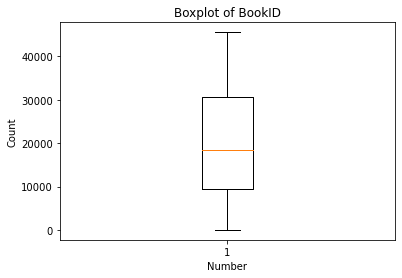

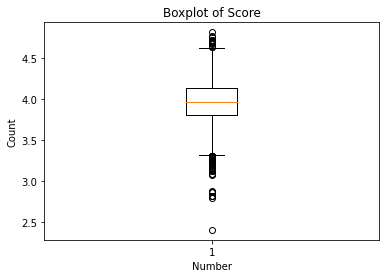

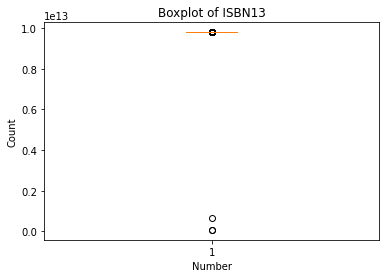

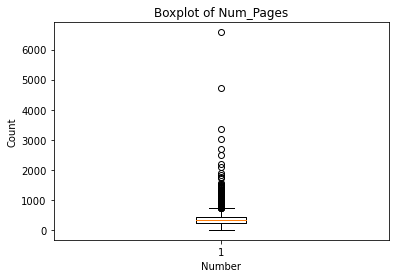

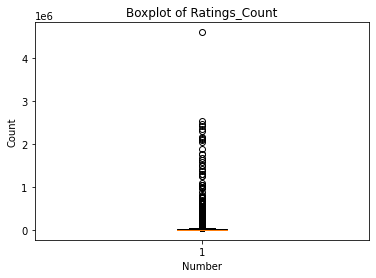

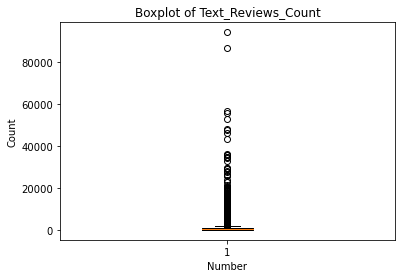

BookID min value: 1
BookID max value: 45583
ISBN13 min value: 76092025986
ISBN13 max value: 9790007672386
Num_Pages min value: 1
Num_Pages max value: 6576
Ratings_Count min value: 1002
Ratings_Count max value: 4597666
Text_Reviews_Count min value: 5
Text_Reviews_Count max value: 94265


In [24]:
# Check boxplots of integer and float variables for any obvious inconsistencies
for col in books.columns:
    if books[col].dtype == 'int64' or books[col].dtype == 'float64':
        _ = plt.title("Boxplot of " + col)
        _ = plt.boxplot(books[col])
        _ = plt.xlabel("Number")
        _ = plt.ylabel("Count")
        _ = plt.show()
        
# Get an idea of the bounds of the data
for col in books.columns:
    if books[col].dtype == 'int64':
        print(col, 'min value:', books[col].min())
        print(col, 'max value:', books[col].max())

In [15]:
create_connection('Milestone5.db')

2.6.0


In [30]:
# create the SQL table 'books'
with sqlite3.connect("Milestone5.db") as conn:
    cursor = conn.cursor()
    cursor.execute('DROP TABLE books')
    cursor.execute('CREATE TABLE books (BookID integer, Title text, Authors text, Score real, ISBN text, ISBN13 integer, Language text, Num_Pages integer, Ratings_Count integer, Text_Reviews_Count integer, Publication_Date integer, Publisher text, Type text)')

In [31]:
# fill 'books' table with the values from pandas dataframe
with sqlite3.connect("Milestone5.db") as conn:
    books.to_sql('books', conn, if_exists = 'replace', index = False)

In [36]:
books.to_csv('mybooks.csv', index = False)

In [36]:
books['Language'] = books['Language'].replace('en-US', 'eng')
books['Language'] = books['Language'].replace('en-GB', 'eng')
books['Language'] = books['Language'].replace('en-CA', 'eng')
no_english = books[books['Language']!='eng']

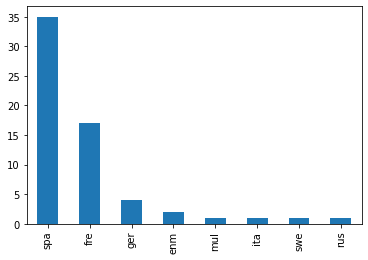

In [37]:
no_english['Language'].value_counts().plot(kind = 'bar')